Average MSE: 24.9795
Average MAE: 3.1736
Average R^2: 0.5678


C:\Users\ryanb\AppData\Local\Temp\ipykernel_23916\1934489560.py:10: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("full_merged_data.csv")


KeyError: 'Projected FPTS'

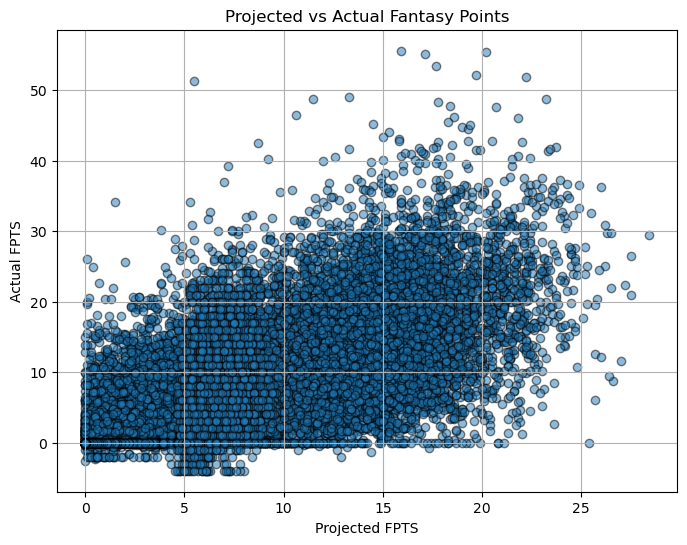

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load the CSV file
df = pd.read_csv("full_merged_data.csv")

# Keep only keys plus the renamed FPTS columns
df = df[["Player", "Year", "Week", "FPTS_actual", "FPTS_proj"]]

# Fill NaN values in 'Actual FPTS' with 0 (NaN for players who did not play)
df['FPTS_actual'] = df['FPTS_actual'].fillna(0)

# Prepare data for modeling
X = df[["FPTS_proj"]].values 
y = df["FPTS_actual"].values   

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
mse_scores, mae_scores, r2_scores = [], [], []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(X):

    # Split data
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store metrics
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Output average metrics
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R^2: {np.mean(r2_scores):.4f}")

# Plotting Projected vs Actual FPTS
plt.figure(figsize=(8, 6))
plt.scatter(df["FPTS_proj"], df["FPTS_actual"], alpha=0.5, edgecolor='k')

plt.xlabel("Projected FPTS")
plt.ylabel("Actual FPTS")
plt.title("Projected vs Actual Fantasy Points")
plt.grid(True)

min_val = min(df["FPTS_proj"].min(), df["FPTS_actual"].min())
max_val = max(df["FPTS_proj"].max(), df["FPTS_actual"].max())

plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)
plt.show()

display(df)